## 06_04_get_reaction_function_calspec


## 필요한 모듈

이 프로젝트를 위해서는 아래의 모듈이 필요하다. 

> numpy, pandas, matplotlib, astropy, version_information

### 모듈 설치

1. 콘솔 창에서 모듈을 설치할 때는 아래와 같은 형식으로 입력하면 된다.

>pip install module_name==version

>conda install module_name==version

2. 주피터 노트북(코랩 포함)에 설치 할 때는 아래의 셀을 실행해서 실행되지 않은 모듈을 설치할 수 있다. (pip 기준) 만약 아나콘다 환경을 사용한다면 7행을 콘다 설치 명령어에 맞게 수정하면 된다.

In [2]:
# Install a pip package in the current Jupyter kernel
import importlib, sys, subprocess
print(f"sys.executable: {sys.executable}")

packages = "numpy, seaborn, pandas, matplotlib, scipy, astropy, pycalspec, pyifu, sbpy, synphot, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        print(f"**** {pkg} module is now installed.")
    else: 
        print(f"******** {pkg} module is already installed.")
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")


sys.executable: /home/guitar79/anaconda3/envs/astro_Python_env/bin/python
******** numpy module is already installed.
******** seaborn module is already installed.
******** pandas module is already installed.
******** matplotlib module is already installed.
******** scipy module is already installed.
******** astropy module is already installed.
******** pycalspec module is already installed.
******** pyifu module is already installed.
******** sbpy module is already installed.
******** synphot module is already installed.
******** version_information module is already installed.
This notebook was generated at 2024-10-08 14:11:58 (KST = GMT+0900) 
0 Python     3.12.4 64bit [GCC 11.2.0]
1 IPython    8.27.0
2 OS         Linux 6.8.0 45 generic x86_64 with glibc2.39
3 numpy      1.26.4
4 seaborn    0.13.2
5 pandas     2.2.2
6 matplotlib 3.9.2
7 scipy      1.14.1
8 astropy    6.1.0
9 pycalspec  0.3.3
10 pyifu      0.13.0
11 sbpy       0.5.0
12 synphot    1.4.0
13 version_information 1.0.4


### 모듈 버전 확인

아래 셀을 실행하면 이 노트북을 실행한 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

### import modules

In [3]:
from glob import glob
from pathlib import Path
import os
import numpy as np
import astropy.units as u

from astropy.io import fits
# astroquery provides an interface to the NIST atomic line database
from astroquery.nist import Nist

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import ysfitsutilpy as yfu
#import ysphotutilpy as ypu
#import ysvisutilpy as yvu

import _astro_utilities
import _Python_utilities

## 폴더 찾기

* MASTERDIR : "CAL-BDF"의 문자열을 가진 폴더를 찾는다. Bias, Dark, Flat 이미지가 들어 있고, 메디안 합성한 master file을 저장한다.
* CALDIR : "SPTR-CAL_"의 문자열을 가진 폴더를 찾는다. 레퍼런스 전등을 찍은 이미지가 들어 있다. 
* DOINGDIRs : 스펙트럼을 촬영한 폴더들이 list로 들어 있다.

In [4]:
#%%
#######################################################
BASEDIR = Path("/mnt/Rdata/OBS_data")  
# BASEDIR = Path("D:\ADAFSA")  
# PROJECDIR = BASEDIR / "01-Variable"
# TODODIR = PROJECDIR / "-_-_-_2016-_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-01_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-05_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-06_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2022-01_-_RiLA600_STX-16803_-_2bin"

# PROJECDIR = BASEDIR / "02-Asteroid"
# TODODIR = PROJECDIR / "-_-_-_2022-_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2022-_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2022-_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_RiLA600_STX-16803_-_2bin"

# PROJECDIR = BASEDIR / "03-EXO"
# TODODIR = PROJECDIR / "-_-_-_2024-05_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-05_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-06_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-06_-_RiLA600_STX-16803_-_2bin"

PROJECDIR = BASEDIR / "04-Spectra"
TODODIR = PROJECDIR / "-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin"

DOINGDIRs = sorted(_Python_utilities.getFullnameListOfsubDirs(TODODIR))
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

try : 
    BDFDIR = [x for x in DOINGDIRs if "CAL-BDF" in str(x)]
    print ("BDFDIR: ", format(BDFDIR))
    MASTERDIR = Path(BDFDIR[0]) / _astro_utilities.master_dir
    if not MASTERDIR.exists():
        os.makedirs("{}".format(str(MASTERDIR)))
        print("{} is created...".format(str(MASTERDIR)))
    print ("MASTERDIR: ", format(MASTERDIR))
except : 
    pass

DOINGDIRs = sorted([x for x in DOINGDIRs if "_LIGHT_" in str(x)])
# print ("DOINGDIRs: ", format(DOINGDIRs))
# print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

filter_str = '2024-05-13'
DOINGDIRs = [x for x in DOINGDIRs if filter_str in x]
# remove = 'BIAS'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'DARK'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'FLAT'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
print ("DOINGDIRs: ", DOINGDIRs)
print ("len(DOINGDIRs): ", len(DOINGDIRs))

DOINGDIRs:  ['/mnt/Rdata/OBS_data/04-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/-_CAL-BDF_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/04-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-CAL_LIGHT_-_2024-05-14_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/04-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP24608-CAPELA_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/04-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP27989-BETELGEUSE_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/04-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP31681-ALHENA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/04-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP32246-MEBSUTA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdata/OBS_data/04-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP32349-SIRIUS_LIGHT_-_2024-04-26_-_TEC140_ASI183MMPro_-_1bin/', '/mnt/Rdat

## Set variables

In [5]:
# #######################################################
# ylow, yhigh = 1775, 1910 
# wei_ylow, wei_yhigh = 1800, 1880
# xhigh = 4200

# # start by taking +/- 15 pixels
# npixels_to_cut = 15
# npixels = 20

# guessed_wavelengths = [667.728, 640.2, 585.2]  # Ar, Ne, Ne
# guessed_xvals = [600, 970, 1550]

# # guessed_wavelengths = [763.511, 750.387, 727.294, 706.722, 696.543,
# #                        667.728, 640.225, 614.306, 585.249, 
# #                        476.487, 451.073, 420.067, 394.898
# #                        ]  
# guessed_wavelengths = [763.511, 750.387, 727.294, 
#                        706.722, 696.543,
#                        614.306, 585.249,
#                        420.067, 394.989]
# guessed_xvals = [1018, 1127, 1318, 
#                  1482, 1560,
#                  2200, 2420,
#                  3770, 3965]

# HBalmer = [656.279,	486.135, 434.0472, 410.1734, 397.0075] * u.nm

# calfile_idx = 0
# #######################################################

## Cal file Summary

In [6]:
# BDFDIR = Path(BDFDIR[0])
# print("BDFDIR", BDFDIR)

# summary_cal = yfu.make_summary(BDFDIR / "*.fit*")
# if summary_cal is not None : 
#     #print(summary)
#     print("len(summary_cal):", len(summary_cal))
#     print("summary_cal:", summary_cal)
#     #print(summary_cal["file"][0])

# fpath_cal = Path(summary_cal["file"][calfile_idx])
# fpath_cal = Path(summary_cal["file"][len(summary_cal["file"])-3])

## light Summary

In [7]:
# for DOINGDIR in DOINGDIRs[:1] :
#     DOINGDIR = Path(DOINGDIR)
#     print("DOINGDIR", DOINGDIR)

#     READINGDIR = DOINGDIR / "reduced"
#     TRACERESULTDIR = DOINGDIR / f"{READINGDIR.parts[-1]}_trace"
#     if not TRACERESULTDIR.exists() :
#         os.mkdir(str(TRACERESULTDIR))
#         print(f"{str(TRACERESULTDIR)} is created...")

#     summary = yfu.make_summary(READINGDIR / "*.fit*")
#     if summary is not None : 
#         #print(summary)
#         print("len(summary):", len(summary))
#         print("summary:", summary)
#         #print(summary["file"][0])

### 분광 자료 display



In [8]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import download_file
import numpy as np

def get_calspec_spectrum(star_name):
    # CALSPEC 데이터 URL
    base_url = "https://archive.stsci.edu/hlsps/reference-atlases/cdbs/current_calspec/"
    # base_url = "https://archive.stsci.edu/hlsps/reference-atlases/cdbs/calspec/"
    # base_url = "https://archive.stsci.edu/hlsps/reference-atlases/cdbs/calobs/"
    # file_name = f"{star_name.lower()}_mod_010.fits"
    # alpha_lyr_004.fits
    # alpha_lyr_005.fits
    # alpha_lyr_mod_001.fits
    # alpha_lyr_mod_002.fits
    file_name = f"alpha_lyr_stis_011.fits"
    # file_name = f"alpha_lyr_mod_004.fits"
    # file_name = f"alpha_lyr_mod_002.fits"
    
    url = base_url + file_name

    try:
        # 파일 다운로드
        local_file = download_file(url, cache=True)
        
        # FITS 파일 열기
        with fits.open(local_file) as hdul:
            data = hdul[1].data
            wavelength = data['WAVELENGTH']
            flux = data['FLUX']
        
        return wavelength, flux
    except Exception as e:
        print(f"오류 발생: {e}")
        return None, None


In [9]:
def plot_spectrum(wavelength, flux, star_name):
    plt.figure(figsize=(12, 6))
    plt.plot(wavelength, flux)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Flux (erg/s/cm^2/Angstrom)')
    plt.title(f'CALSPEC Spectrum of {star_name}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.tight_layout()
    
    # 스펙트럼 저장
    plt.savefig(f'{star_name.lower()}_calspec_spectrum.png')
    print(f"스펙트럼이 '{star_name.lower()}_calspec_spectrum.png' 파일로 저장되었습니다.")
    
    plt.show()

스펙트럼이 'vega_calspec_spectrum.png' 파일로 저장되었습니다.


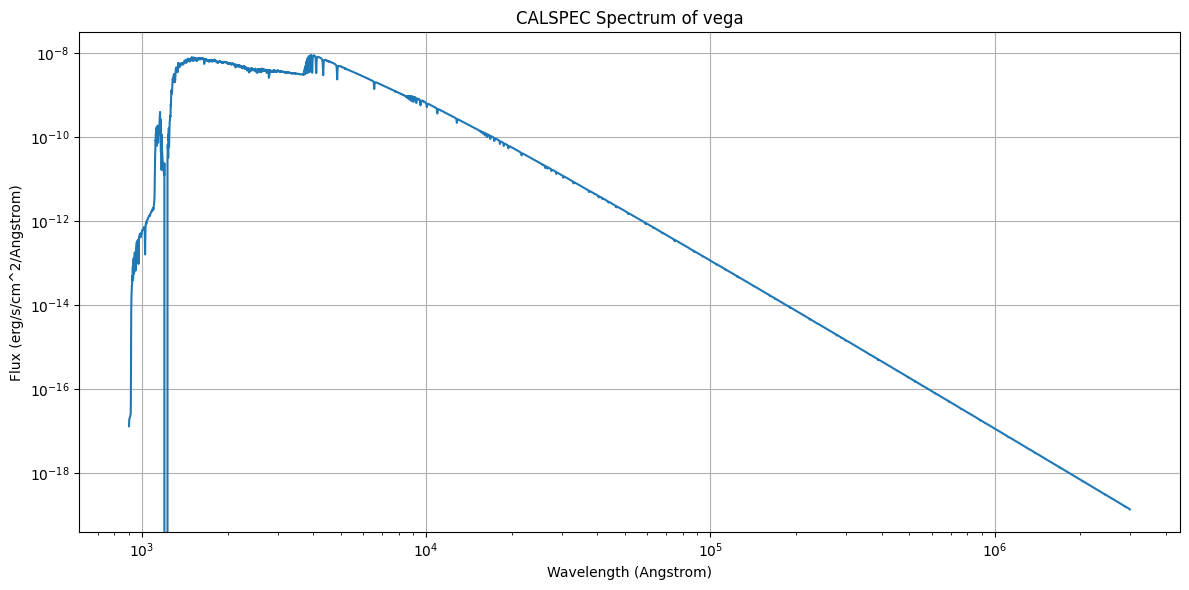

In [10]:
star_name = "vega"  # 다른 CALSPEC 별로 변경 가능
    
wavelength, flux = get_calspec_spectrum(star_name)

if wavelength is not None and flux is not None:
    plot_spectrum(wavelength, flux, star_name)
else:
    print("스펙트럼 데이터를 가져오는 데 실패했습니다.")

# make dataframe

In [11]:
import pandas as pd

wavelength.shape
flux.shape
print(wavelength)
# print(type())
# DataFrame으로 변환 
df1 = pd.DataFrame((wavelength/10).tolist(), columns=['wavelength'])
df1['calspec_vega'] = (flux*10**11).tolist()
# df = pd.DataFrame([wavelength.tolist(), flux.tolist()], columns=['wavelength', 'calspec_vega'])
# df = pd.DataFrame(wavelength, columns=["wavelength"])

df1

[9.00452000e+02 9.01354000e+02 9.02258000e+02 ... 2.98765844e+06
 2.99065357e+06 2.99365170e+06]


,wavelength,calspec_vega
0,90.045200,1.283795e-06
1,90.135400,1.737430e-06
2,90.225800,1.845712e-06
3,90.316300,1.890829e-06
4,90.406800,1.934306e-06
...,...,...
9187,298167.717169,1.371341e-08
9188,298466.630654,1.365786e-08
9189,298765.843799,1.360230e-08
9190,299065.356906,1.353882e-08


##관측 자료 처리한것 읽기

In [12]:
fpath_obs = Path("/mnt/Rdata/OBS_data/04-Spectra/-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin/SPTR-HIP91262-VEGA_LIGHT_-_2024-05-01_-_TEC140_ASI183MMPro_-_1bin/reduced_trace_HBalmer/SPTR-HIP91262-VEGA_LIGHT__2024-05-01-16-11-34_5sec_TEC140_ASI183MMPro_-20c_1bin_spctrum_result_using_Hbalmer.txt")

# Opening file
obs_file = open(fpath_obs, 'r')
Lines = obs_file.readlines()
print(Lines[12])


wavelengths:[905.1418886536018, 905.0098604489469, 904.8778322442921, 904.7458040396374, 904.6137758349826, 904.4817476303277, 904.3497194256729, 904.2176912210182, 904.0856630163634, 903.9536348117085, 903.8216066070537, 903.689578402399, 903.5575501977441, 903.4255219930893, 903.2934937884345, 903.1614655837798, 903.0294373791249, 902.8974091744701, 902.7653809698153, 902.6333527651606, 902.5013245605057, 902.3692963558509, 902.2372681511961, 902.1052399465414, 901.9732117418865, 901.8411835372317, 901.7091553325769, 901.5771271279222, 901.4450989232673, 901.3130707186125, 901.1810425139577, 901.049014309303, 900.9169861046481, 900.7849578999933, 900.6529296953385, 900.5209014906837, 900.3888732860289, 900.2568450813741, 900.1248168767193, 899.9927886720645, 899.8607604674097, 899.7287322627549, 899.5967040581, 899.4646758534453, 899.3326476487905, 899.2006194441357, 899.0685912394808, 898.9365630348261, 898.8045348301713, 898.6725066255165, 898.5404784208616, 898.4084502162069, 898.

In [13]:
wavelenth_el = Lines[12].split(":")
flux_avg_el = Lines[13].split(":")
# print(wavelenth_el[0])
# print(wavelenth_el[1])
print(type(wavelenth_el[1]))
wave = wavelenth_el[1].replace("[", "")
wave = wave.replace("]", "")
print(wave)
wave = [float(i) for i in wave.split(', ')] 
# wave = np.array(wave)
# wave = wave.astype(np.float32)
wave

print(type(flux_avg_el[1]))
flux_avg = flux_avg_el[1].replace("[", "")
flux_avg = flux_avg.replace("]", "")
print(flux_avg)
flux_avg = [float(i) for i in flux_avg.split(', ')] 

# df = pd.DataFrame.from_dict(data=data, orient='columns')

df2 = pd.DataFrame(wave, columns=['wavelength'])
df2['flux_avg'] = flux_avg

df2

<class 'str'>
905.1418886536018, 905.0098604489469, 904.8778322442921, 904.7458040396374, 904.6137758349826, 904.4817476303277, 904.3497194256729, 904.2176912210182, 904.0856630163634, 903.9536348117085, 903.8216066070537, 903.689578402399, 903.5575501977441, 903.4255219930893, 903.2934937884345, 903.1614655837798, 903.0294373791249, 902.8974091744701, 902.7653809698153, 902.6333527651606, 902.5013245605057, 902.3692963558509, 902.2372681511961, 902.1052399465414, 901.9732117418865, 901.8411835372317, 901.7091553325769, 901.5771271279222, 901.4450989232673, 901.3130707186125, 901.1810425139577, 901.049014309303, 900.9169861046481, 900.7849578999933, 900.6529296953385, 900.5209014906837, 900.3888732860289, 900.2568450813741, 900.1248168767193, 899.9927886720645, 899.8607604674097, 899.7287322627549, 899.5967040581, 899.4646758534453, 899.3326476487905, 899.2006194441357, 899.0685912394808, 898.9365630348261, 898.8045348301713, 898.6725066255165, 898.5404784208616, 898.4084502162069, 898

,wavelength,flux_avg
0,905.141889,78.843475
1,905.009860,70.621872
2,904.877832,79.153717
3,904.745804,79.266899
4,904.613776,77.260284
...,...,...
5491,180.175017,13.148818
5492,180.042989,2.708111
5493,179.910960,6.024861
5494,179.778932,15.351475


In [14]:
# df["flux_avg"] = df1.merge(df, on="wavelength")["flux_avg"]
# df1.reset_index(drop=True, inplace=True)
# df2.reset_index(drop=True, inplace=True)

df12 = pd.concat([df1, df2], axis=0, 
                 join='outer',
                 ignore_index=True,)
df12
# result = pd.merge(df, df1, on='wavelength')
# print(result)

,wavelength,calspec_vega,flux_avg
0,90.045200,0.000001,NaN
1,90.135400,0.000002,NaN
2,90.225800,0.000002,NaN
3,90.316300,0.000002,NaN
4,90.406800,0.000002,NaN
...,...,...,...
14683,180.175017,NaN,13.148818
14684,180.042989,NaN,2.708111
14685,179.910960,NaN,6.024861
14686,179.778932,NaN,15.351475


In [15]:
# df12df12 = df2.merge(df1, how = 'outer', on='wavelength')
# df12df12 = df12df12.sort_values(by=['wavelength'], axis=0)
# df12df12.reset_index(drop=True, inplace=True)
# df12df12

In [16]:
print(len(df12['wavelength']))
print(len(df12['calspec_vega']))

14688
14688


In [17]:
df12 = df12.sort_values(by=['wavelength'], axis=0)
df12.reset_index(drop=True, inplace=True)
df12
# print(df12)

,wavelength,calspec_vega,flux_avg
0,90.045200,1.283795e-06,NaN
1,90.135400,1.737430e-06,NaN
2,90.225800,1.845712e-06,NaN
3,90.316300,1.890829e-06,NaN
4,90.406800,1.934306e-06,NaN
...,...,...,...
14683,298167.717169,1.371341e-08,NaN
14684,298466.630654,1.365786e-08,NaN
14685,298765.843799,1.360230e-08,NaN
14686,299065.356906,1.353882e-08,NaN


(100.0, 1000.0)

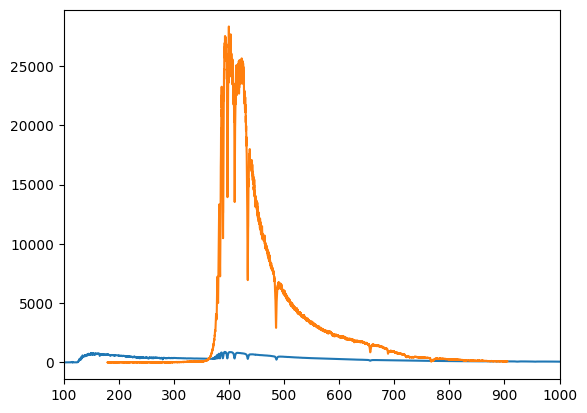

In [18]:
plt.plot(df1['wavelength']*u.um, df1['calspec_vega'])
plt.plot(df2['wavelength']*u.um, df2['flux_avg'])
plt.xlim((100, 1000))

### 아래 그래프는 왜 안그려질까??

(100.0, 1000.0)

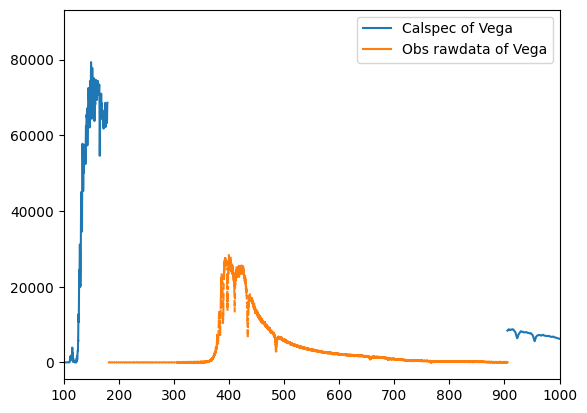

In [19]:
plt.plot(df12['wavelength']*u.um, df12['calspec_vega']*10**2, label="Calspec of Vega")
plt.plot(df12['wavelength']*u.um, df12['flux_avg'], label="Obs rawdata of Vega")
plt.legend()
plt.xlim((100, 1000))

## solution

(100.0, 1000.0)

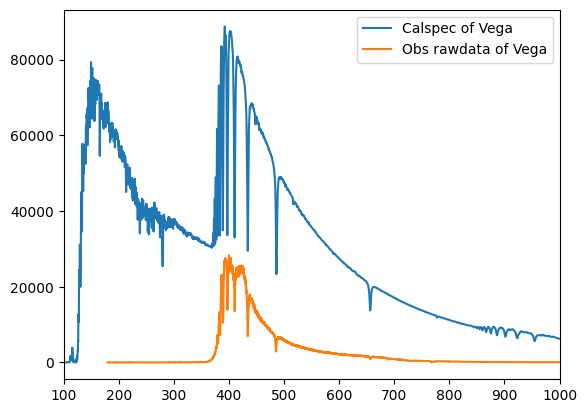

In [20]:
df12_inp = df12.interpolate(method='linear', limit_direction='forward', axis=0)
plt.plot(df12_inp['wavelength']*u.um, df12_inp['calspec_vega']*10**2, label="Calspec of Vega")
plt.plot(df12_inp['wavelength']*u.um, df12_inp['flux_avg'], label="Obs rawdata of Vega")
plt.legend()
plt.xlim((100, 1000))

(100.0, 1000.0)

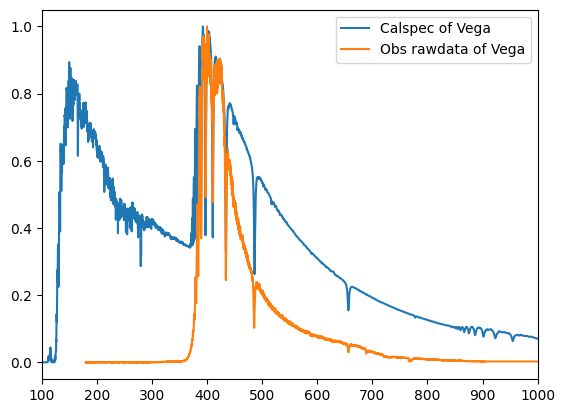

In [21]:
# df12_inp[] = df12.interpolate(method='linear', limit_direction='forward', axis=0)
plt.plot(df12_inp['wavelength']*u.um, df12_inp['calspec_vega']/df12_inp['calspec_vega'].max(), label="Calspec of Vega")
plt.plot(df12_inp['wavelength']*u.um, df12_inp['flux_avg']/df12_inp['flux_avg'].max(), label="Obs rawdata of Vega")
plt.legend()
plt.xlim((100, 1000))

In [22]:
df12_inp.columns

df12_inp['reaction_fn'] = (df12_inp['calspec_vega']/df12_inp['calspec_vega'].max())/(df12_inp['flux_avg']/df12_inp['flux_avg'].max())
df12_inp['flux_avg_cal'] = df12_inp['flux_avg']*df12_inp['reaction_fn']
df12_inp

,wavelength,calspec_vega,flux_avg,reaction_fn,flux_avg_cal
0,90.045200,1.283795e-06,NaN,NaN,NaN
1,90.135400,1.737430e-06,NaN,NaN,NaN
2,90.225800,1.845712e-06,NaN,NaN,NaN
3,90.316300,1.890829e-06,NaN,NaN,NaN
4,90.406800,1.934306e-06,NaN,NaN,NaN
...,...,...,...,...,...
14683,298167.717169,1.371341e-08,78.843475,5.550220e-09,4.375986e-07
14684,298466.630654,1.365786e-08,78.843475,5.527736e-09,4.358259e-07
14685,298765.843799,1.360230e-08,78.843475,5.505253e-09,4.340533e-07
14686,299065.356906,1.353882e-08,78.843475,5.479557e-09,4.320273e-07


In [52]:
df12_inp.to_csv("vega_response_fn.csv")

(100.0, 1000.0)

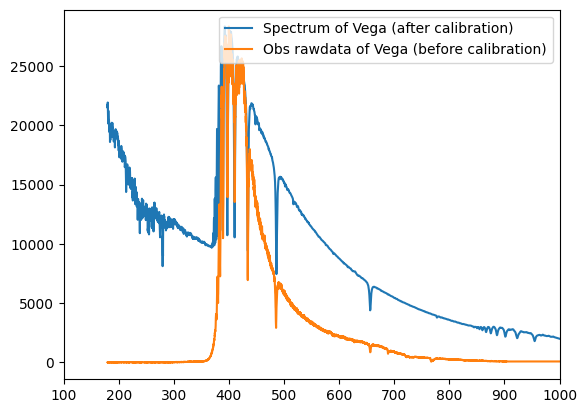

In [23]:
# df12_inp = df12.interpolate(method='linear', limit_direction='forward', axis=0)
plt.plot(df12_inp['wavelength']*u.um, df12_inp['flux_avg_cal'], label="Spectrum of Vega (after calibration)")
plt.plot(df12_inp['wavelength']*u.um, df12_inp['flux_avg'], label="Obs rawdata of Vega (before calibration)")
plt.legend()
plt.xlim((100, 1000))

### sns로 그려보자.


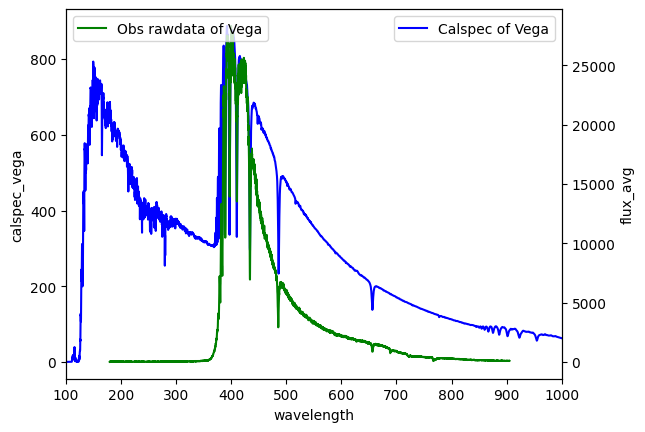

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots()
sns.lineplot(data=df12, x='wavelength', y='calspec_vega', label="Calspec of Vega", ax=ax1, color="blue");
ax2 = ax1.twinx()
sns.lineplot(data=df12, x='wavelength', y='flux_avg', label="Obs rawdata of Vega", ax=ax2, color="green");
ax1.set_xlim(100, 1000)
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
plt.show()


## sbpy 이용

In [25]:
from sbpy.calib import vega_spectrum
vega = vega_spectrum.get()

type(vega)

        Use TUNITn as per FITS standards instead. [sbpy.spectroscopy.sources]
        Use TUNITn as per FITS standards instead. [sbpy.spectroscopy.sources]


sbpy.calib.core.Vega

In [26]:
# dir(vega)
# vega.wave

In [27]:
len(vega.wave)
len(vega.fluxd)
print(vega.observe)

<bound method SpectralStandard.observe of <Vega: Dust-free template spectrum of Bohlin 2014>>


(100.0, 1000.0)

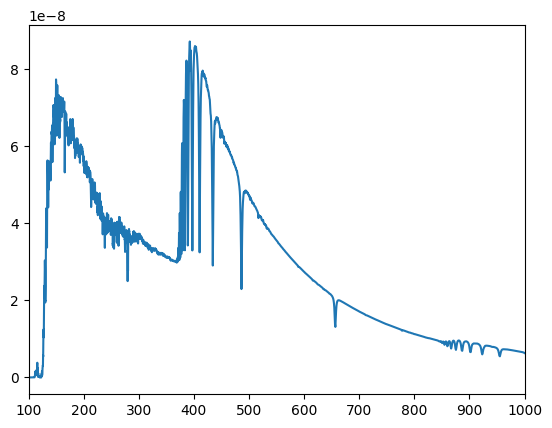

In [28]:
plt.plot(vega.wave/10*u.um, vega.fluxd)
plt.xlim((100, 1000))

In [29]:

df3 = pd.DataFrame(vega.wave/10, columns=['wavelength'])
df3['Vega_spec'] = vega.fluxd

df3

,wavelength,Vega_spec
0,90.045203,1.249058e-16
1,90.135400,1.690418e-16
2,90.225800,1.795770e-16
3,90.316300,1.839667e-16
4,90.406800,1.881967e-16
...,...,...
8822,298753.875000,1.404853e-18
8823,299053.375000,1.399096e-18
8824,299353.200000,1.393338e-18
8825,299653.275000,1.379355e-18


In [30]:
df2

,wavelength,flux_avg
0,905.141889,78.843475
1,905.009860,70.621872
2,904.877832,79.153717
3,904.745804,79.266899
4,904.613776,77.260284
...,...,...
5491,180.175017,13.148818
5492,180.042989,2.708111
5493,179.910960,6.024861
5494,179.778932,15.351475


In [31]:
df32 = pd.concat([df3, df2], axis=0, 
                ignore_index=True,
                join='outer',
                )
df32


,wavelength,Vega_spec,flux_avg
0,90.045203,1.249058e-16,NaN
1,90.135400,1.690418e-16,NaN
2,90.225800,1.795770e-16,NaN
3,90.316300,1.839667e-16,NaN
4,90.406800,1.881967e-16,NaN
...,...,...,...
14318,180.175017,NaN,13.148818
14319,180.042989,NaN,2.708111
14320,179.910960,NaN,6.024861
14321,179.778932,NaN,15.351475


In [32]:
df32 = df32.sort_values(by=['wavelength'], axis=0)
df32

,wavelength,Vega_spec,flux_avg
0,90.045203,1.249058e-16,NaN
1,90.135400,1.690418e-16,NaN
2,90.225800,1.795770e-16,NaN
3,90.316300,1.839667e-16,NaN
4,90.406800,1.881967e-16,NaN
...,...,...,...
8822,298753.875000,1.404853e-18,NaN
8823,299053.375000,1.399096e-18,NaN
8824,299353.200000,1.393338e-18,NaN
8825,299653.275000,1.379355e-18,NaN


8.70389982310371e-08


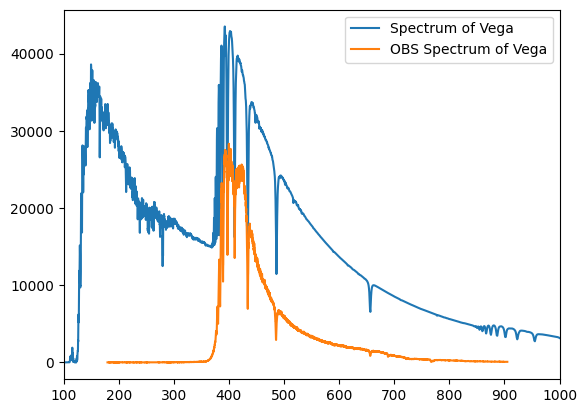

In [33]:
print(df3['Vega_spec'].max())
plt.plot(df3['wavelength']*u.um, df3['Vega_spec']*5* 10**11, label="Spectrum of Vega")
plt.plot(df2['wavelength']*u.um, df2['flux_avg'], label="OBS Spectrum of Vega")
plt.xlim((100, 1000))
plt.legend()

## 아래 그래프는 왜 안그려지는가??

8.70389982310371e-08


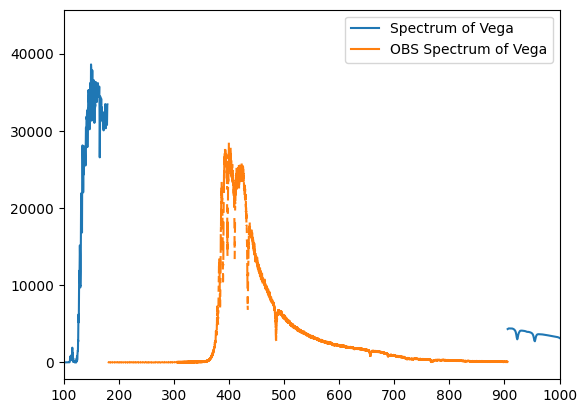

In [34]:
print(df32['Vega_spec'].max())
plt.plot(df32['wavelength']*u.um, df32['Vega_spec']*5* 10**11, label="Spectrum of Vega")
plt.plot(df32['wavelength']*u.um, df32['flux_avg'], label="OBS Spectrum of Vega")
plt.xlim((100, 1000))
plt.legend()

## solution

(100.0, 1000.0)

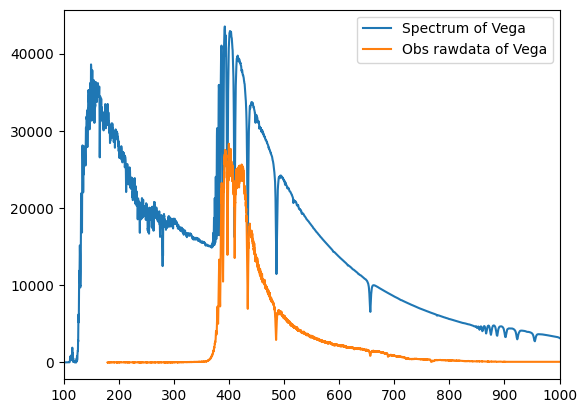

In [35]:
df32_inp = df32.interpolate(method='linear', limit_direction='forward', axis=0)
plt.plot(df32_inp['wavelength']*u.um, df32_inp['Vega_spec']*5*10**11, label="Spectrum of Vega")
plt.plot(df32_inp['wavelength']*u.um, df32_inp['flux_avg'], label="Obs rawdata of Vega")
plt.legend()
plt.xlim((100, 1000))

(100.0, 1000.0)

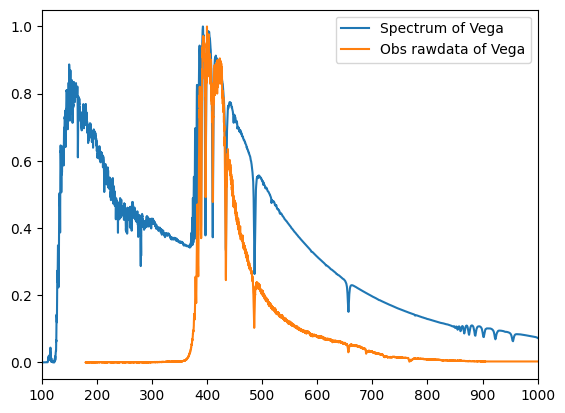

In [36]:
# df12_inp[] = df12.interpolate(method='linear', limit_direction='forward', axis=0)
plt.plot(df32_inp['wavelength']*u.um, df32_inp['Vega_spec']/df32_inp['Vega_spec'].max(), label="Spectrum of Vega")
plt.plot(df32_inp['wavelength']*u.um, df32_inp['flux_avg']/df32_inp['flux_avg'].max(), label="Obs rawdata of Vega")
plt.legend()
plt.xlim((100, 1000))

In [37]:
df12_inp.columns

df32_inp['reaction_fn'] = (df32_inp['Vega_spec']/df32_inp['Vega_spec'].max())/(df32_inp['flux_avg']/df32_inp['flux_avg'].max())
df32_inp['flux_avg_cal'] = df32_inp['flux_avg']*df32_inp['reaction_fn']
df32_inp

,wavelength,Vega_spec,flux_avg,reaction_fn,flux_avg_cal
0,90.045203,1.249058e-16,NaN,NaN,NaN
1,90.135400,1.690418e-16,NaN,NaN,NaN
2,90.225800,1.795770e-16,NaN,NaN,NaN
3,90.316300,1.839667e-16,NaN,NaN,NaN
4,90.406800,1.881967e-16,NaN,NaN,NaN
...,...,...,...,...,...
8822,298753.875000,1.404853e-18,78.843475,5.798998e-09,4.572132e-07
8823,299053.375000,1.399096e-18,78.843475,5.775232e-09,4.553393e-07
8824,299353.200000,1.393338e-18,78.843475,5.751465e-09,4.534655e-07
8825,299653.275000,1.379355e-18,78.843475,5.693747e-09,4.489148e-07


(100.0, 1000.0)

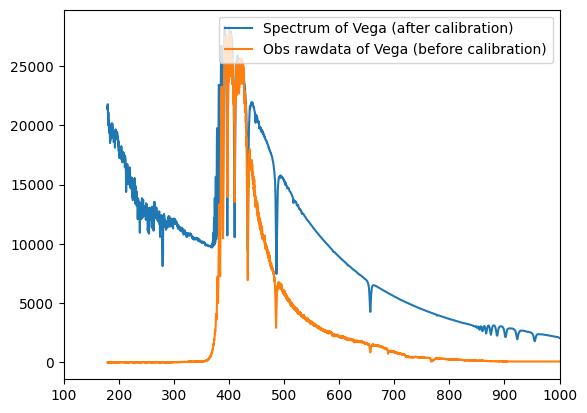

In [38]:
# df12_inp = df12.interpolate(method='linear', limit_direction='forward', axis=0)
plt.plot(df32_inp['wavelength']*u.um, df32_inp['flux_avg_cal'], label="Spectrum of Vega (after calibration)")
plt.plot(df32_inp['wavelength']*u.um, df32_inp['flux_avg'], label="Obs rawdata of Vega (before calibration)")
plt.legend()
plt.xlim((100, 1000))

# 반응함수


(100.0, 1000.0)

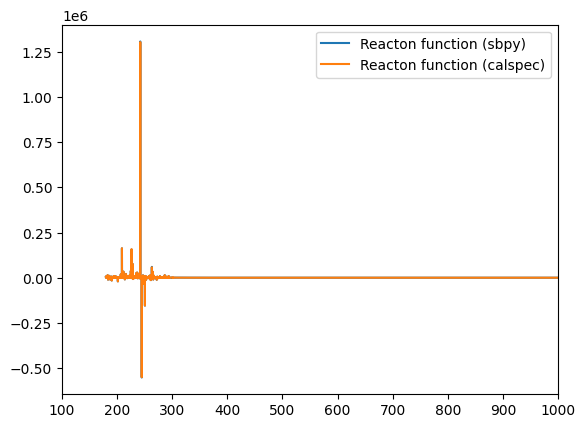

In [39]:
# df12_inp = df12.interpolate(method='linear', limit_direction='forward', axis=0)
plt.plot(df32_inp['wavelength']*u.um, df32_inp['reaction_fn'], label="Reacton function (sbpy)")
plt.plot(df12_inp['wavelength']*u.um, df12_inp['reaction_fn'], label="Reacton function (calspec)")
plt.legend()
plt.xlim((100, 1000))


(-300.0, 300.0)

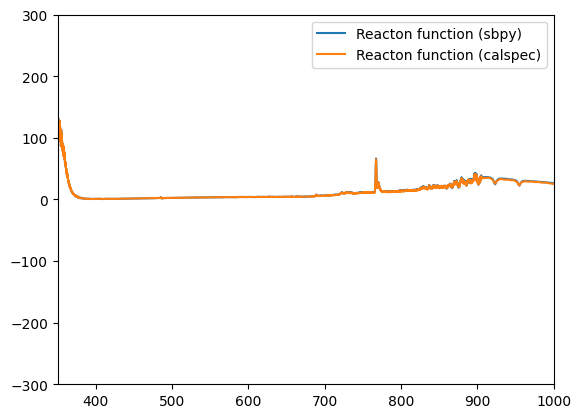

In [51]:
# df12_inp = df12.interpolate(method='linear', limit_direction='forward', axis=0)
plt.plot(df32_inp['wavelength']*u.um, df32_inp['reaction_fn'], label="Reacton function (sbpy)")
plt.plot(df12_inp['wavelength']*u.um, df12_inp['reaction_fn'], label="Reacton function (calspec)")
plt.legend()
plt.xlim((350, 1000))
plt.ylim((-0.3*10**3, 0.3*10**3))


(100.0, 1000.0)

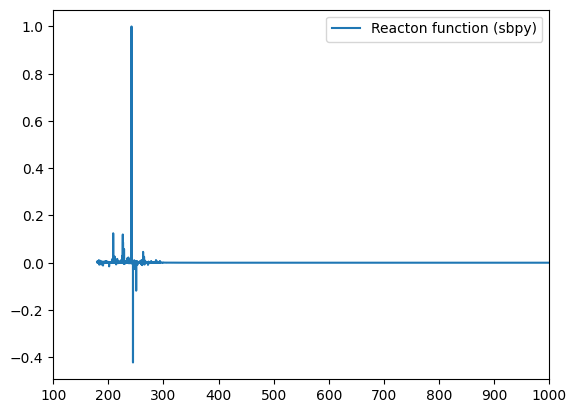

In [41]:

# df12_inp = df12.interpolate(method='linear', limit_direction='forward', axis=0)
plt.plot(df32_inp['wavelength']*u.um, df32_inp['reaction_fn']/df32_inp['reaction_fn'].max(), label="Reacton function (sbpy)")
# plt.plot(df12_inp['wavelength']*u.um, df12_inp['reaction_fn']/df12_inp['reaction_fn'].max(), label="Reacton function (calspec)", alpha=0.2)
plt.legend()
plt.xlim((100, 1000))

# seaborn


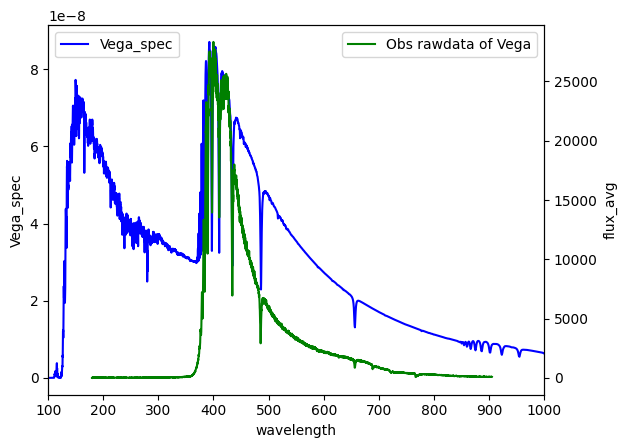

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots()
sns.lineplot(data=df32, x='wavelength', y='Vega_spec', label="Vega_spec", ax=ax1, color="blue");
ax2 = ax1.twinx()
sns.lineplot(data=df32, x='wavelength', y='flux_avg', label="Obs rawdata of Vega", ax=ax2, color="green");
ax1.set_xlim(100, 1000)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
